In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import string
import nltk
from nltk.corpus import stopwords
from textblob import Word
from keras.models import Sequential
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences, to_categorical, plot_model
from keras.layers import Dense, Embedding, LSTM, Bidirectional,Dropout
import pydot
import graphviz

In [ ]:
df=pd.read_csv(r"goodreads_train.csv",usecols=['rating','review_text'])

In [ ]:
df.head()

,rating,review_text
0,5,This is a special book. It started slow for ab...
1,3,Recommended by Don Katz. Avail for free in Dec...
2,3,"A fun, fast paced science fiction thriller. I ..."
3,0,Recommended reading to understand what is goin...
4,4,"I really enjoyed this book, and there is a lot..."


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900000 entries, 0 to 899999
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   rating       900000 non-null  int64 
 1   review_text  900000 non-null  object
dtypes: int64(1), object(1)
memory usage: 13.7+ MB


In [ ]:
df.value_counts('rating')

rating
4    313688
5    265007
3    188972
2     72627
0     30988
1     28718
dtype: int64

In [ ]:
df.describe()

,rating
count,900000.000000
mean,3.689639
std,1.252583
min,0.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,5.000000


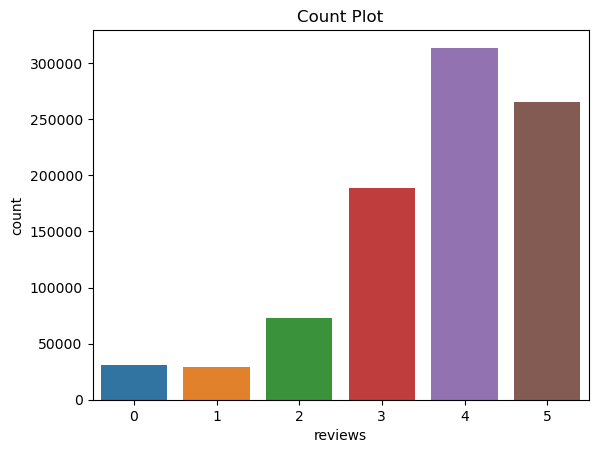

In [ ]:
sns.countplot(x=df['rating'])
plt.xlabel('reviews')
plt.ylabel('count')
plt.title('Count Plot')
plt.show()

As there is too much disparity in the count of each rating, we will be taking 20000 random  values from each rating and use it as training dataset

In [ ]:
train1=df.query('rating == 1').iloc[np.random.randint(0,df.query('rating == 1').value_counts('rating'),20000), :]
train1['rating']=0
train5=df.query('rating == 5').iloc[np.random.randint(0,df.query('rating == 5').value_counts('rating'),20000), :]
train5['rating']=1

train_df=pd.concat([train1,train5])

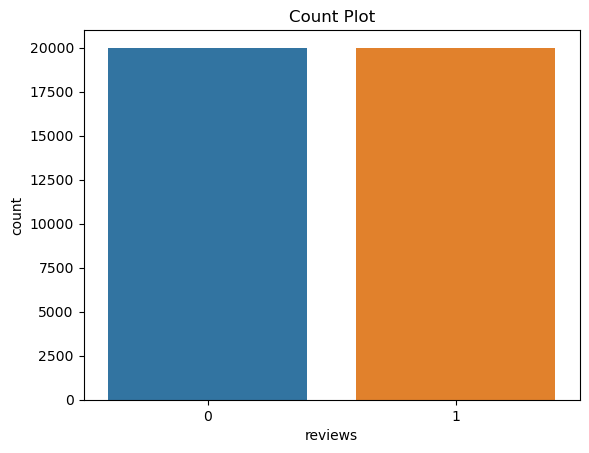

In [ ]:
sns.countplot(x=train_df['rating'])
plt.xlabel('reviews')
plt.ylabel('count')
plt.title('Count Plot')
plt.show()

In [ ]:
contractions = { "ain't": "are not",
                "aren't": "are not",
                "can't": "cannot",
                "can't've": "cannot have",
                "'cause": "because",
                "could've": "could have",
                "couldn't": "could not",
                "couldn't've": "could not have",
                "didn't": "did not",
                "doesn't": "does not",
                "don't": "do not",
                "hadn't": "had not",
                "hadn't've": "had not have",
                "hasn't": "has not",
                "haven't": "have not",
                "he'd": "he had",
                "he'd've": "he would have",
                "he'll": "he will",
                "he'll've": "he will have",
                "he's": "he is",
                "how'd": "how did",
                "how'd'y": "how do you",
                "how'll": "how will",
                "how's": "how is",
                "I'd": "I would",
                "I'd've": "I would have",
                "I'll": "I will",
                "I'll've": "I will have",
                "I'm": "I am",
                "I've": "I have",
                "isn't": "is not",
                "it'd": "it had",
                "it'd've": "it would have",
                "it'll": "it will",
                "it'll've": "it will have",
                "it's": "it is",
                "let's": "let us",
                "ma'am": "madam",
                "mayn't": "may not",
                "might've": "might have",
                "mightn't": "might not",
                "mightn't've": "might not have",
                "must've": "must have",
                "mustn't": "must not",
                "mustn't've": "must not have",
                "needn't": "need not",
                "needn't've": "need not have",
                "o'clock": "of the clock",
                "oughtn't": "ought not",
                "oughtn't've": "ought not have",
                "shan't": "shall not",
                "sha'n't": "shall not",
                "shan't've": "shall not have",
                "she'd": "she would",
                "she'd've": "she would have",
                "she'll": "she will",
                "she'll've": "she will have",
                "she's": "she is",
                "should've": "should have",
                "shouldn't": "should not",
                "shouldn't've": "should not have",
                "so've": "so have",
                "so's": "so as",
                "that'd": "that would",
                "that'd've": "that would have",
                "that's": "that is",
                "there'd": "there would",
                "there'd've": "there would have",
                "there's": "there is",
                "they'd": "they would",
                "they'd've": "they would have",
                "they'll": "they will",
                "they'll've": "they will have",
                "they're": "they are",
                "they've": "they have",
                "to've": "to have",
                "wasn't": "was not",
                "we'd": "we would",
                "we'd've": "we would have",
                "we'll": "we will",
                "we'll've": "we will have",
                "we're": "we are",
                "we've": "we have",
                "weren't": "were not",
                "what'll": "what will",
                "what'll've": "what will have",
                "what're": "what are",
                "what's": "what is",
                "what've": "what have",
                "when's": "when is",
                "when've": "when have",
                "where'd": "where did",
                "where's": "where is",
                "where've": "where have",
                "who'll": "who will",
                "who'll've": "who will have",
                "who's": "who is",
                "who've": "who have",
                "why's": "why is",
                "why've": "why have",
                "will've": "will have",
                "won't": "will not",
                "won't've": "will not have",
                "would've": "would have",
                "wouldn't": "would not",
                "wouldn't've": "would not have",
                "y'all": "you all",
                "y'all'd": "you all would",
                "y'all'd've": "you all would have",
                "y'all're": "you all are",
                "y'all've": "you all have",
                "you'd": "you would",
                "you'd've": "you would have",
                "you'll": "you will",
                "you'll've": "you will have",
                "you're": "you are",
                "you've": "you have"
}
stopnltk=nltk.corpus.stopwords.words('english')
stopnltk.remove('not')
stopnltk.remove('no')

In [ ]:
def cleanse_text(data, column='review_text'):

    #start with converting every word in each column to lowercase
    data[column]=data[column].apply(lambda x: x.lower())

    #next, replacing contractions with their full forms
    data['review_text']=data['review_text'].apply(lambda x: ' '.join([contractions.get(word,word) for word in x.split()]))

    #removing punctuations
    data['review_text']=data['review_text'].apply(lambda x: x.translate(str.maketrans('','',string.punctuation)))

    #removing all "spoiler alert" tags
    data['review_text']=data['review_text'].str.replace('spoiler alert','')

    #removing all numeric characters
    data['review_text']=data['review_text'].str.translate(str.maketrans("","",string.digits))

    #removing all the stopwords
    data['review_text']=data['review_text'].apply(lambda x: " ".join([i for i in x.split() if i not in stopnltk]))

    #lemmatization
    data['review_text']=data['review_text'].apply(lambda x: " ".join([Word(i).lemmatize() for i in x.split()]))

    return data

In [ ]:
train_df

,rating,review_text
254214,0,i am actually so upset. i loved the first book...
488625,0,This was much more entertaining than the secon...
452257,0,I want to start by saying that i really wanted...
803805,0,That was not a good book for me. The sister wa...
693870,0,I am getting really really grumpy about how ma...
...,...,...
810591,1,"I've always loved ""boy wonder"". It was love at..."
528452,1,The fountainhead is perhaps one of those books...
256261,1,***4.50 Tru Blue Stars*** \n I love this book ...
688021,1,This book was very compelling and believable. ...


In [ ]:
train_df=cleanse_text(train_df)

now let's generate a wordcloud with our training dataset

In [ ]:
stopwc=set(STOPWORDS)

In [ ]:
comment_words2=""
for rev in train_df['review_text']:
    tokens2=rev.split()
    for i in range(len(tokens2)):
        tokens2[i]=tokens2[i].lower()
    comment_words2 += " ".join(tokens2)+" "

In [ ]:
wordcloud = WordCloud(width = 800, height = 800,background_color ='black',stopwords = stopwc,
                      min_font_size = 10).generate(comment_words2)

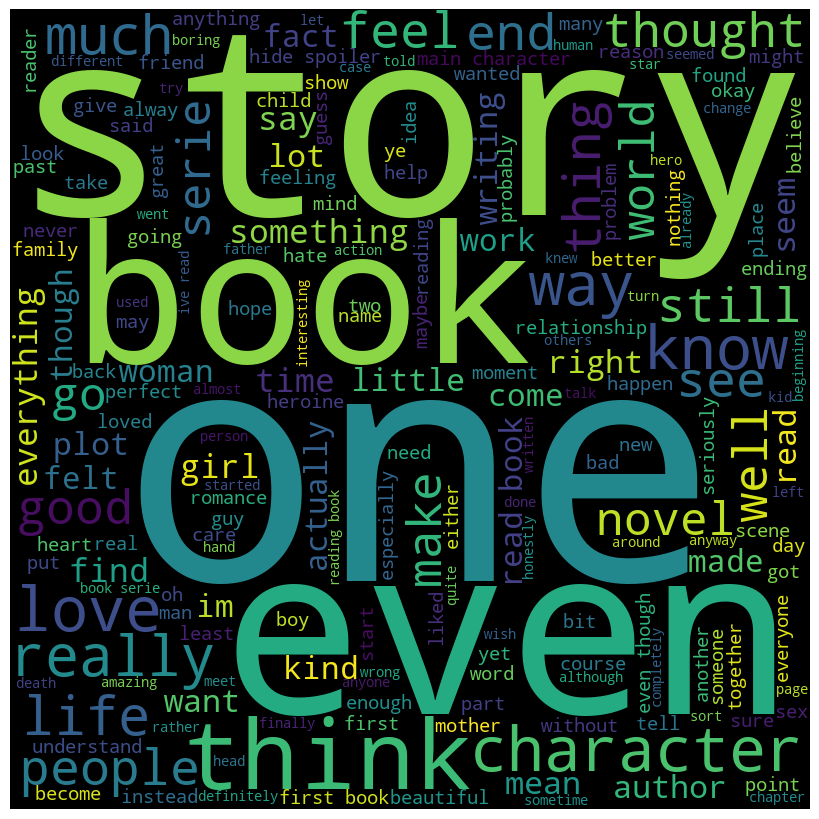

In [ ]:
plt.figure(figsize=(8,8),facecolor=None)
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

In [ ]:
train_df=train_df.sample(frac=1)
train_df

,rating,review_text
608956,1,finished one freaking day love amie full revie...
411487,0,sounded interesting found best thing editor ar...
639802,0,not get hook book tryed keep going bored slow dnf
832002,1,past year lot freshman girl ask book also avai...
401429,0,not expectingor wanted book much sexual emphas...
...,...,...
17986,0,love holy sex woman every single day week disg...
582195,1,rating loved last book adventure action little...
764885,0,hour one favorite book ever book barely even r...
307630,1,star review tyrant


In [ ]:
x=train_df.review_text
y=train_df.rating

In [ ]:
tokenizer=Tokenizer(num_words=5000)
tokenizer.fit_on_texts(x)
x=tokenizer.texts_to_sequences(x)
x=pad_sequences(x,maxlen=500,padding='post')

In [ ]:
print(x)
print(y)
print(x.shape,y.shape)

[[ 262    4  587 ...    0    0    0]
 [1080  113   97 ...    0    0    0]
 [   1   12 1880 ...    0    0    0]
 ...
 [ 472    4  144 ...    0    0    0]
 [  62   41    0 ...    0    0    0]
 [ 853  261 2409 ...    0    0    0]]
608956    1
411487    0
639802    0
832002    1
401429    0
         ..
17986     0
582195    1
764885    0
307630    1
128335    0
Name: rating, Length: 40000, dtype: int64
(40000, 500) (40000,)


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.75)

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(10000, 500)
(10000,)
(30000, 500)
(30000,)


In [ ]:
model = Sequential()
model.add(Embedding(input_dim=5000,output_dim=64,input_length=x_train.shape[1]))
model.add(Bidirectional(LSTM(64,dropout=0.2,recurrent_dropout=0.2)))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer='adam', metrics = ['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 64)           320000    
                                                                 
 bidirectional (Bidirectiona  (None, 128)              66048     
 l)                                                              
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 386,177
Trainable params: 386,177
Non-trainable params: 0
_________________________________________________________________
None


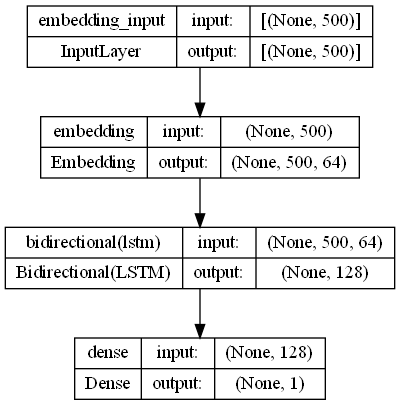

In [ ]:
plot_model(model,to_file='model.png',show_shapes=True)

In [ ]:
model.fit(x_train,y_train,epochs=1,batch_size=50)

200/200 [==============================] - 240s 1s/step - loss: 0.1643 - accuracy: 0.9361 - val_loss: 0.2295 - val_accuracy: 0.9168


In [ ]:
scores=model.evaluate(x_test,y_test,verbose=1)
print("accuracy: %.2f%%"%(scores[1]*100))

938/938 [==============================] - 101s 108ms/step - loss: 0.2295 - accuracy: 0.9168
accuracy: 91.68%
